In [1]:

import numpy as np
import pandas as pd


In [2]:
#reading the data from csv files
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_target = pd.read_csv('gender_submission.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/titanic/train.csv'

# data discovery and analysis


In [ ]:
print("data description: ")
print(df.describe())#We use the describe() method to get a summary of the numerical columns in the dataset.
print("data info :")
print(df.info())  # Displays information about data types and non-null values
print("data shape :")
print(df.shape)  # Displays the shape of the dataframe

data description: 
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
data info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

**visualizing the class tickets with the survival see which class ticket have the least survival**


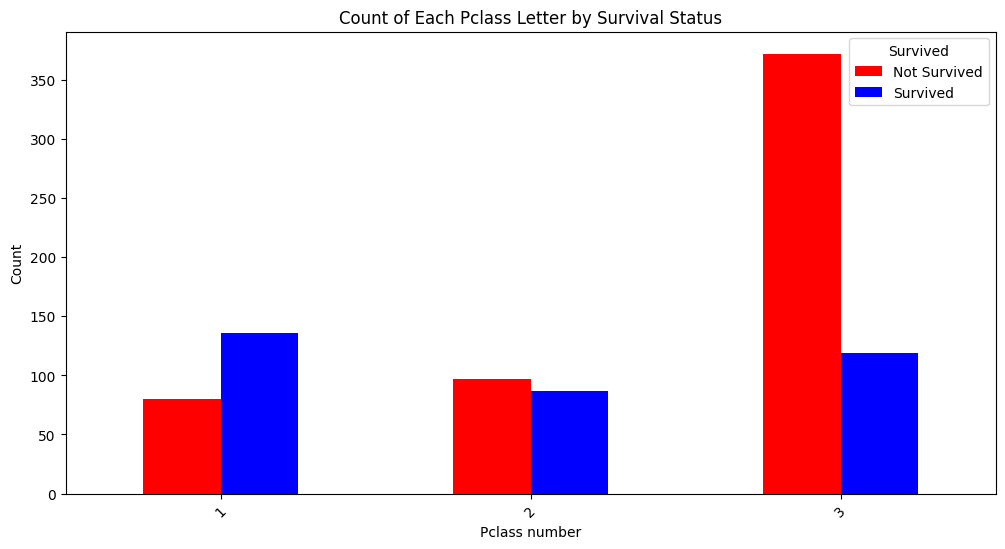

In [ ]:
import matplotlib.pyplot as plt
Pclass_survival_counts = pd.crosstab(df['Pclass'], df['Survived'])
Pclass_survival_counts.plot(kind='bar', figsize=(12, 6), color=['red', 'blue'])

# Add titles and labels
plt.title('Count of Each Pclass Letter by Survival Status')
plt.xlabel('Pclass number')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()


In [ ]:
#extraction of cabin letter only for better visualization
import re
def extract_cabin_letter(cabin):
    if pd.isna(cabin):
        return None
    match = re.match(r'([A-Z])', cabin)
    return match.group(1) if match else None
df['Cabin'] = df['Cabin'].apply(extract_cabin_letter)

we see that C cabin have the largest number of deathes

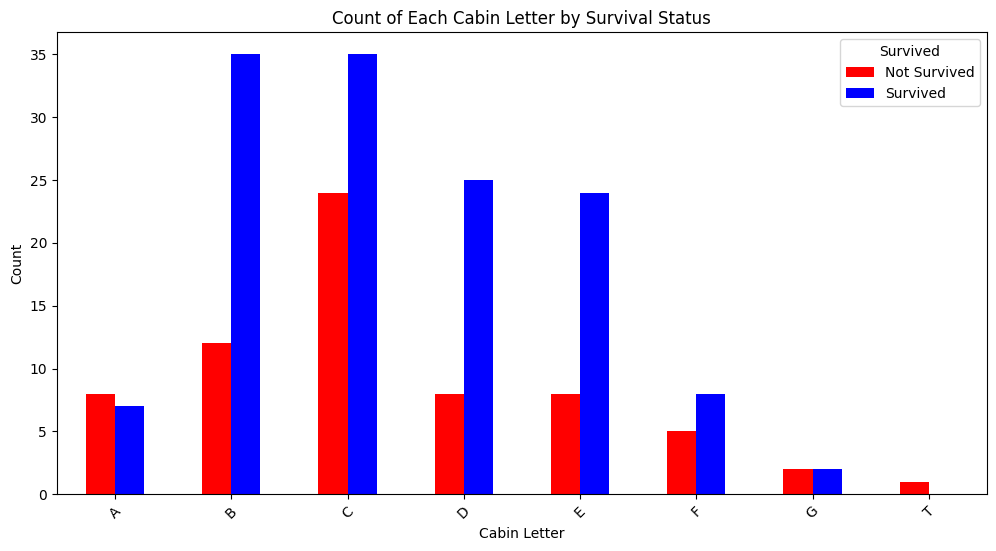

In [ ]:
cabin_survival_counts = pd.crosstab(df['Cabin'], df['Survived'])
cabin_survival_counts.plot(kind='bar', figsize=(12, 6), color=['red', 'blue'])

# Add titles and labels
plt.title('Count of Each Cabin Letter by Survival Status')
plt.xlabel('Cabin Letter')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

> knowing how the age of the person have impact with his survival
after the ploting it seems that age do not have a great impact

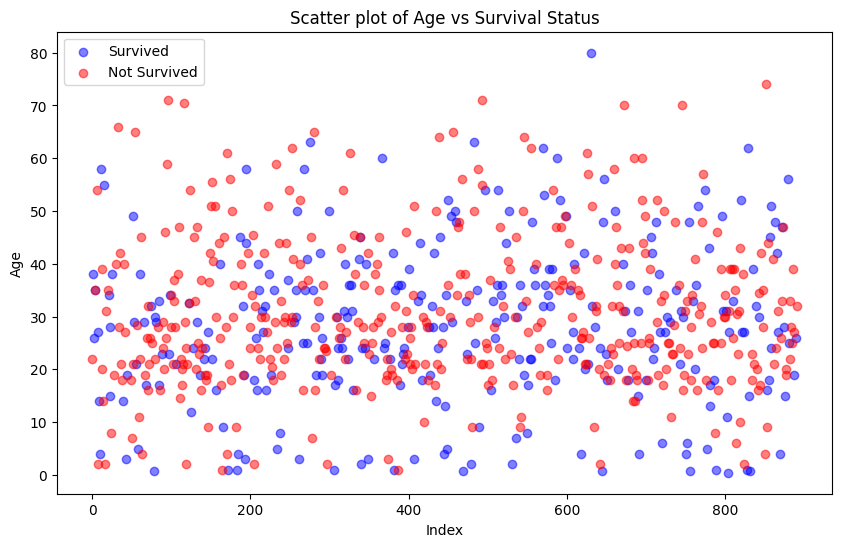

In [ ]:
df_non_null = df.dropna(subset=['Age'])
plt.figure(figsize=(10, 6))

plt.scatter(df[df['Survived'] == 1].index, df[df['Survived'] == 1]['Age'], color='blue', label='Survived', alpha=0.5)

plt.scatter(df[df['Survived'] == 0].index, df[df['Survived'] == 0]['Age'], color='red', label='Not Survived', alpha=0.5)

plt.title('Scatter plot of Age vs Survival Status')
plt.xlabel('Index')
plt.ylabel('Age')
plt.legend()
plt.show()

In [ ]:
correlation = df[['Age', 'Survived']].corr().loc['Age', 'Survived']
correlation #so the correlation will be very little

-0.07722109457217759

let's see the gender impact with survival rate


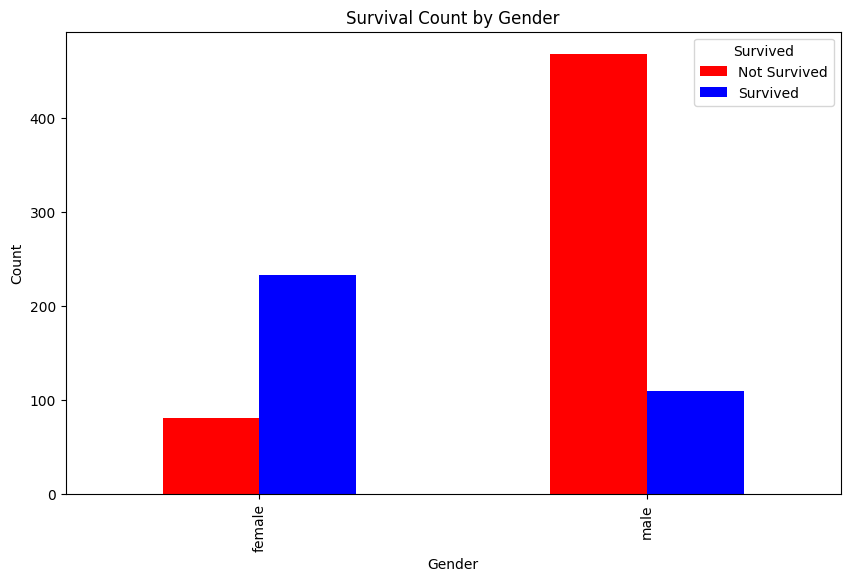

In [ ]:
survival_counts = pd.crosstab(df['Sex'], df['Survived'])

survival_counts.plot(kind='bar', figsize=(10, 6), color=['red', 'blue'])

plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

fare with survival

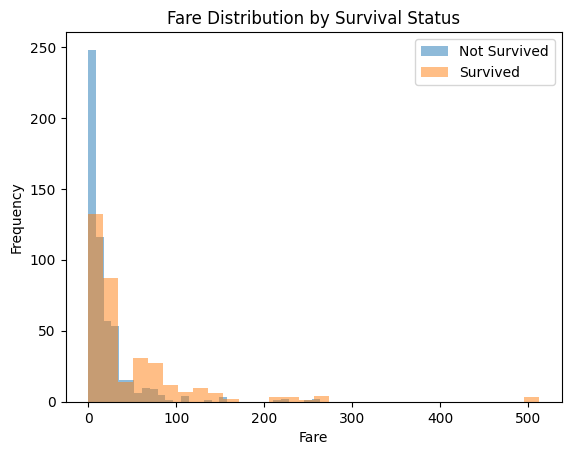

In [ ]:
df[df['Survived'] == 0]['Fare'].plot(kind='hist', alpha=0.5, label='Not Survived', bins=30)
df[df['Survived'] == 1]['Fare'].plot(kind='hist', alpha=0.5, label='Survived', bins=30)

# Add titles and labels
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.show()

let us see the skewness of data

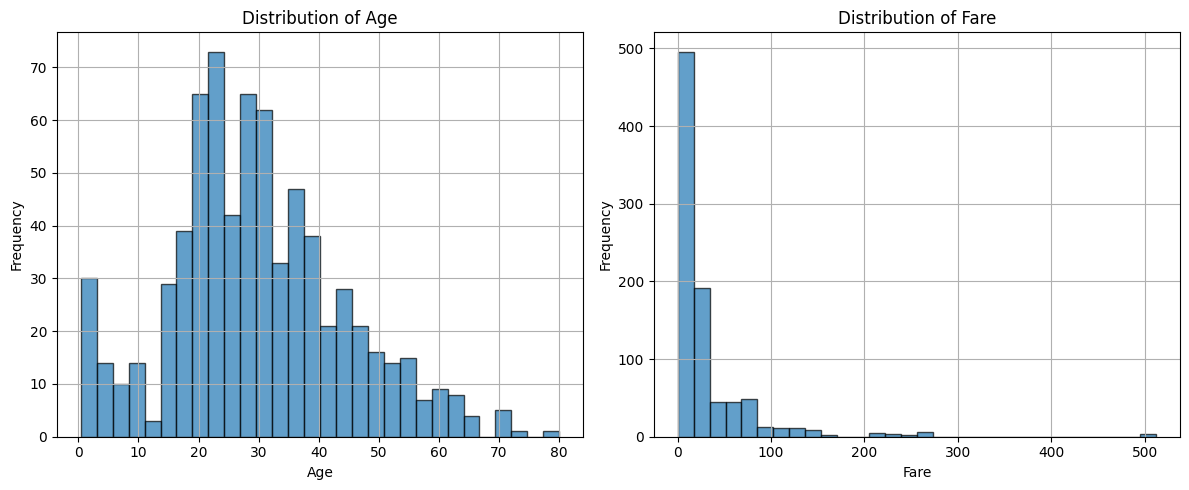

In [ ]:
numerical_df = df[['Age', 'Fare']]

# Plot histograms for 'Age' and 'Fare'
plt.figure(figsize=(12, 5))

# Plot histogram for 'Age'
plt.subplot(1, 2, 1)
numerical_df['Age'].hist(bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plot histogram for 'Fare'
plt.subplot(1, 2, 2)
numerical_df['Fare'].hist(bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# preprocessing
we will preprocess our dataframe and our test dataframe

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


there are null in (Age , Embarked , Cabin) will do same pre processing in df_test too
* i will remove cabin colom as the null is more than the half ',
* i will use the mode to fillna in embarked ,
* i will use the median to fillna in age as there as some outliers
* i also delete name and passengerid as they have no use in the training process

In [ ]:
columns_to_drop = ['Name', 'PassengerId','Cabin','Ticket']
df.drop(columns=columns_to_drop , inplace=True)
df_test.drop(columns=columns_to_drop , inplace=True)

In [ ]:
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

median_age_test = df_test['Age'].median()
df_test['Age'] = df_test['Age'].fillna(median_age_test)

we will consider Pclass a catergorical variable

In [ ]:
categorical_columns = ['Sex', 'Embarked', 'Pclass']

df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_test = pd.get_dummies(df_test, columns=categorical_columns, drop_first=True)

changing all bool to int

In [ ]:
bool_columns = df.select_dtypes(include='bool').columns

df[bool_columns] = df[bool_columns].astype(int)
df_test[bool_columns] = df_test[bool_columns].astype(int)

**training the model**

In [ ]:
from sklearn.preprocessing import StandardScaler

y = df['Survived']
X = df.drop('Survived',axis=1)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)



In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Fare        417 non-null    float64
 4   Sex_male    418 non-null    int64  
 5   Embarked_Q  418 non-null    int64  
 6   Embarked_S  418 non-null    int64  
 7   Pclass_2    418 non-null    int64  
 8   Pclass_3    418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


In [ ]:
median_fare = df_test['Fare'].median()
df_test['Fare']=df_test['Fare'].fillna(median_fare)
df_test_scaled = scaler.fit_transform(df_test)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression

param_grid_log_reg = {
    'max_iter': [50,100,150,200, 500, 1000],
    'solver': ['liblinear', 'saga'],
    'C': [0.1, 1, 10]
}

log_reg = LogisticRegression()
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='accuracy')
grid_search_log_reg.fit(X_scaled, y)



GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10],
                         'max_iter': [50, 100, 150, 200, 500, 1000],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [ ]:
print("Best parameters for Logistic Regression:", grid_search_log_reg.best_params_)
print("Best score for Logistic Regression:", grid_search_log_reg.best_score_)

Best parameters for Logistic Regression: {'C': 0.1, 'max_iter': 50, 'solver': 'saga'}
Best score for Logistic Regression: 0.7979913376435881


In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

random_forest.fit(X_scaled, y)

RandomForestClassifier()

In [ ]:
from xgboost import XGBClassifier

xgboost = XGBClassifier()

xgboost.fit(X_scaled, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# testing the three models

In [ ]:
y_pred_log_reg = grid_search_log_reg.best_estimator_.predict(df_test_scaled)
y_pred_rf = random_forest.predict(df_test_scaled)
y_pred_xgb = xgboost.predict(df_test_scaled)

In [ ]:
df_target.drop(columns='PassengerId' , inplace=True)

In [ ]:
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [
        accuracy_score(df_target, y_pred_log_reg),
        accuracy_score(df_target, y_pred_rf),
        accuracy_score(df_target, y_pred_xgb)
    ],

}

results_df = pd.DataFrame(results)

# Print the DataFrame
print(results_df)

                 Model  Accuracy
0  Logistic Regression  0.952153
1        Random Forest  0.820574
2              XGBoost  0.854067


In [ ]:
results_df

,Model,Accuracy
0,Logistic Regression,0.952153
1,Random Forest,0.820574
2,XGBoost,0.854067


In [ ]:
print('the classification report of logistic regression')
print(classification_report(df_target, y_pred_log_reg, output_dict=True))
print('-------------------------------------------------------------------')
print('the classification report of random forests')
print(classification_report(df_target, y_pred_rf, output_dict=True))
print('-------------------------------------------------------------------')
print('the classification report of xgboost')
print(classification_report(df_target, y_pred_xgb, output_dict=True))


the classification report of logistic regression
{'0': {'precision': 0.948905109489051, 'recall': 0.9774436090225563, 'f1-score': 0.9629629629629628, 'support': 266}, '1': {'precision': 0.9583333333333334, 'recall': 0.9078947368421053, 'f1-score': 0.9324324324324325, 'support': 152}, 'accuracy': 0.9521531100478469, 'macro avg': {'precision': 0.9536192214111923, 'recall': 0.9426691729323309, 'f1-score': 0.9476976976976976, 'support': 418}, 'weighted avg': {'precision': 0.9523335545233356, 'recall': 0.9521531100478469, 'f1-score': 0.9518609518609518, 'support': 418}}
-------------------------------------------------------------------
the classification report of random forests
{'0': {'precision': 0.8422939068100358, 'recall': 0.8834586466165414, 'f1-score': 0.8623853211009174, 'support': 266}, '1': {'precision': 0.7769784172661871, 'recall': 0.7105263157894737, 'f1-score': 0.7422680412371134, 'support': 152}, 'accuracy': 0.8205741626794258, 'macro avg': {'precision': 0.8096361620381114, 

In [ ]:
def extract_simple_metrics(report):
    metrics = {
        'Accuracy': report.get('accuracy', 'N/A'),
        'Macro avg F1-score': report.get('macro avg', {}).get('f1-score', 'N/A'),
        'Weighted avg F1-score': report.get('weighted avg', {}).get('f1-score', 'N/A')
    }
    return metrics

# Compute classification reports
report_log_reg = classification_report(df_target, y_pred_log_reg, output_dict=True)
report_rf = classification_report(df_target, y_pred_rf, output_dict=True)
report_xgb = classification_report(df_target, y_pred_xgb, output_dict=True)

# Extract metrics for each model
log_reg_metrics = extract_simple_metrics(report_log_reg)
rf_metrics = extract_simple_metrics(report_rf)
xgb_metrics = extract_simple_metrics(report_xgb)

# Prepare results for DataFrame
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [
        accuracy_score(df_target, y_pred_log_reg),
        accuracy_score(df_target, y_pred_rf),
        accuracy_score(df_target, y_pred_xgb)
    ],
    'Macro avg F1-score': [
        log_reg_metrics['Macro avg F1-score'],
        rf_metrics['Macro avg F1-score'],
        xgb_metrics['Macro avg F1-score']
    ],
    'Weighted avg F1-score': [
        log_reg_metrics['Weighted avg F1-score'],
        rf_metrics['Weighted avg F1-score'],
        xgb_metrics['Weighted avg F1-score']
    ]
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Print the DataFrame
print(results_df)

                 Model  Accuracy  Macro avg F1-score  Weighted avg F1-score
0  Logistic Regression  0.952153            0.947698               0.951861
1        Random Forest  0.820574            0.802327               0.818706
2              XGBoost  0.854067            0.838705               0.852281


In [ ]:
results_df

,Model,Accuracy,Macro avg F1-score,Weighted avg F1-score
0,Logistic Regression,0.952153,0.947698,0.951861
1,Random Forest,0.820574,0.802327,0.818706
2,XGBoost,0.854067,0.838705,0.852281
